1. Downloaded the labeled dataset with 8 files -- > Directory = /TrafficLabelling/ files

2. Picking the data files named "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"

In [1]:
#2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

dataset1 = pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

print(dataset1.head())

                                  Flow ID      Source IP   Source Port  \
0  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.12         35396   
1  192.168.10.16-192.168.10.50-60058-22-6  192.168.10.16         60058   
2  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.12         35396   
3  192.168.10.12-192.168.10.50-35398-22-6  192.168.10.12         35398   
4  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.50            22   

   Destination IP   Destination Port   Protocol      Timestamp  \
0   192.168.10.50                 22          6  7/7/2017 1:00   
1   192.168.10.50                 22          6  7/7/2017 1:00   
2   192.168.10.50                 22          6  7/7/2017 1:00   
3   192.168.10.50                 22          6  7/7/2017 1:00   
4   192.168.10.12              35396          6  7/7/2017 1:00   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0         1266342                  41                       44  ...   
1         131935

In [2]:
#print(dataset1.columns.tolist())

#stripping the whitespace from the columns names
dataset1 = dataset1.rename(columns=lambda x: x.strip())
#print(dataset1.columns.tolist())

#Examining the features
#understanding the data set
print(dataset1.info())
#There are no null values!
#dtypes: float64(36), int64(44), object(5)
#Five objects, IDs, IPs, Date time, and Class (Label)

#Descriptive Statistics
print(dataset1.describe())

#More than one class for its label
print(dataset1["Label"].unique())
#yes two classes BENIGN and PortScan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      286467 non-null  object 
 1   Source IP                    286467 non-null  object 
 2   Source Port                  286467 non-null  int64  
 3   Destination IP               286467 non-null  object 
 4   Destination Port             286467 non-null  int64  
 5   Protocol                     286467 non-null  int64  
 6   Timestamp                    286467 non-null  object 
 7   Flow Duration                286467 non-null  int64  
 8   Total Fwd Packets            286467 non-null  int64  
 9   Total Backward Packets       286467 non-null  int64  
 10  Total Length of Fwd Packets  286467 non-null  int64  
 11  Total Length of Bwd Packets  286467 non-null  int64  
 12  Fwd Packet Length Max        286467 non-null  int64  
 13 

3. For the Dataset 1, pick a machine learning methodology and justify your choice.

    We will use supervised learning for a task driven approach for the labelled data set. Furthermore, since there are only two segments of the data such as BENIGN and not BENIGN classification ML approach would be best. We will test Random Forest, Decision Tree, and Neural Network Classification.

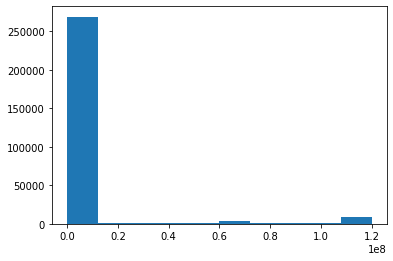

In [3]:
#4. binary classes for supervised learning, 0 and 1
dataset1['Label'] = dataset1['Label'].replace({'BENIGN': 0, 'PortScan': 1})


#plt.hist(dataset1['Source Port'])
#Anamolies seen <15000, normal dist good
#plt.hist(dataset1['Destination Port'])
#Anamolies seen > 55000, normal dist good
plt.hist(dataset1['Flow Duration'])
#Anomlies seen > 1.1, normal dist good
#plt.hist(dataset1['Total Fwd Packets'])
#Not normal distrubtion not needed
#plt.hist(dataset1['Total Backward Packets'])
#Not normal distrubtion not needed
#plt.hist(dataset1['Total Length of Fwd Packets'])
#Not normal distrubtion not needed
#plt.hist(dataset1['Total Length of Bwd Packets'])
#Not normal distrubtion not needed
#plt.hist(dataset1['Flow Bytes/s'])
#Bad data for "Flow Bytes/s","Flow Packets/s"

#6 run code above and analyzed all histograms to create a remove list

remove_list = ["Flow ID","Source IP","Destination IP","Timestamp","Flow Bytes/s","Flow Packets/s","Total Fwd Packets","Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets"]


In [4]:
#7. 10 fold performance

y = dataset1['Label']
X = dataset1.drop(remove_list, axis=1)
X = X.drop('Label', axis=1)
#print(y)

X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.3)

#TAKES A LONG TIME TO RUN but performance is already noted below

#clf_tree = DecisionTreeClassifier()
#clf_rf = RandomForestClassifier()
#clf_nn = MLPClassifier()

#clf_tree.fit(X_train, Y_train)
#clf_rf.fit(X_train, Y_train)
#clf_nn.fit(X_train, Y_train)

#dt_scores = cross_val_score(estimator=clf_tree, X=X, y=y, cv=10, scoring='accuracy')
#print(f'Decision Tree accuracy mean,stdev= {dt_scores.mean():.2f},{dt_scores.std():.2f}\n')

#rf_scores = cross_val_score(estimator=clf_rf, X=X, y=y, cv=10, scoring='accuracy')
#print(f'Random Forest accuracy mean,stdev= {rf_scores.mean():.2f},{rf_scores.std():.2f}\n')

#nn_scores = cross_val_score(estimator=clf_nn, X=X, y=y, cv=10, scoring='accuracy')
#print(f'Neural Network accuracy mean,stdev= {nn_scores.mean():.2f},{nn_scores.std():.2f}\n')

Decision Tree accuracy mean,stdev= 1.00,0.00

Random Forest accuracy mean,stdev= 1.00,0.00

Neural Network accuracy mean,stdev= 0.99,0.03

In [5]:
#8. Converting code into a function
#9. We will use random forest classifier for the next 7 datasets

def run_tests(path):
    dataset = pd.read_csv(path)
    #stripping the whitespace from the columns names
    dataset = dataset.rename(columns=lambda x: x.strip())
    
    dataset['Label'] = dataset['Label'].replace({'BENIGN': 0})
    dataset['Label'] = dataset['Label'].mask(dataset['Label'] != 0, 1)
    
    remove_list = ["Flow ID","Source IP","Destination IP","Timestamp","Flow Bytes/s","Flow Packets/s","Total Fwd Packets","Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets"]

    y = dataset1['Label']
    X = dataset1.drop(remove_list, axis=1)
    X = X.drop('Label', axis=1)
    #print(y)

    X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf_rf = RandomForestClassifier()
    
    
    clf_rf.fit(X_train, Y_train)
    
    return clf_rf.score(X_train, Y_train)

my_list = ["Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv","Friday-WorkingHours-Morning.pcap_ISCX.csv","Monday-WorkingHours.pcap_ISCX.csv","Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv","Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv","Tuesday-WorkingHours.pcap_ISCX.csv","Wednesday-workingHours.pcap_ISCX.csv"]

for dat in my_list:
    print(run_tests(dat))


1.0
1.0
1.0
1.0


/Users/samlasker/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,1,3,6,84) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


1.0
1.0
1.0


10. The Random Forest Classifier with the selected independent features has performed well across the 8 datasets with 100% accuracy. In developing a machine learning model where I am not the subject expect it's important to learn about the features statistically first, such as histogram, max, min, average, etc. to form an unbiased opinion on each feature. In the next step, it's important to gain knowledge from industry professionals about each feature and what is important about each before selecting the independent features to run the classifier on. Cybersecurity detection is very important in the new world where everything revolves around the internet, and all forms of communication and data is stored on the internet.